In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.datasets import fetch_openml

In [0]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
mnist.data.shape

(70000, 784)

In [0]:
sample_digit = mnist.data[0]

In [0]:
sample_digit_img = sample_digit.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

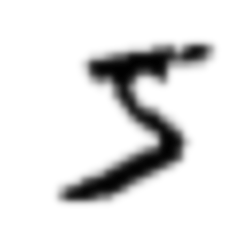

In [8]:
plt.imshow(sample_digit_img, cmap=plt.cm.binary, interpolation='gaussian')
plt.axis('off')

In [9]:
mnist.target[0]

'5'

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [12]:
y_train[:5]

array(['5', '4', '3', '5', '0'], dtype=object)

In [13]:
y_test[:5]

array(['4', '4', '0', '7', '7'], dtype=object)

In [14]:
X_train.shape

(56000, 784)

In [15]:
X_test.shape

(14000, 784)

In [0]:
y_train_5 = np.int32(y_train == '5')

In [17]:
y_train_5[:100]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=500)

In [20]:
log_reg.fit(X_train, y_train_5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
log_reg.predict([sample_digit])

array([1], dtype=int32)

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
sgd_clf = SGDClassifier(loss='log', max_iter=1000, tol=1.0, n_jobs=-1)

In [24]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=1.0, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [25]:
sgd_clf.predict([sample_digit])

array([1], dtype=int32)

# Calculating Accuracy of a classifier

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

In [28]:
scores

array([0.96582204, 0.96764343, 0.96796314])

In [29]:
scores_2 = cross_val_score(log_reg, X_train, y_train_5, cv=3, scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [30]:
scores_2

array([0.97235764, 0.97396475, 0.9740705 ])

In [0]:
scores_3 = cross_val_score(SGDClassifier(loss='hinge'), X_train, y_train_5, cv=3, scoring='accuracy')

In [32]:
scores_3

array([0.96657203, 0.95553651, 0.96592735])

# Custom Cross Validation

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [0]:
kfold = StratifiedKFold(n_splits=3, random_state=42)

In [35]:
for train_ix, valid_ix in kfold.split(X_train, y_train_5):
  sgd_clf_clone = clone(sgd_clf)
  X_train_folds = X_train[train_ix]
  y_train_folds = y_train_5[train_ix]
  X_valid_fold = X_train[valid_ix]
  y_valid_fold = y_train_5[valid_ix]
  sgd_clf_clone.fit(X_train_folds, y_train_folds)
  y_valid_hat = sgd_clf.predict(X_valid_fold)
  accuracy = sum(y_valid_hat == y_valid_fold) / len(y_valid_fold)
  print(accuracy)

0.9614292601917823
0.9623935286869877
0.9631951141112183


# Confusion Matrix

In [0]:
from sklearn.model_selection import cross_val_predict

In [37]:
print(cross_val_predict.__doc__)

Generate cross-validated estimates for each input data point

    It is not appropriate to pass these predictions into an evaluation
    metric. Use :func:`cross_validate` to measure generalization error.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    estimator : estimator object implementing 'fit' and 'predict'
        The object to use to fit the data.

    X : array-like
        The data to fit. Can be, for example a list, or an array at least 2d.

    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.

    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

        - None, to use the default 3-fo

In [0]:
y_train_5_hat = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
conf_mat = confusion_matrix(y_train_5, y_train_5_hat)

In [41]:
conf_mat

array([[50409,   546],
       [ 1409,  3636]])

In [42]:
confusion_matrix(y_train_5, y_train_5)

array([[50955,     0],
       [    0,  5045]])

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [44]:
precision_score(y_train_5, y_train_5_hat)

0.8694404591104734

In [45]:
3706 / (615 + 3706)

0.8576718352233279

In [46]:
recall_score(y_train_5, y_train_5_hat)

0.7207135777998018

In [47]:
3706 / (1306 + 3706)

0.7394253790901836

In [48]:
f1_score(y_train_5, y_train_5_hat)

0.7881218164083668

In [0]:
df = sgd_clf.decision_function

In [50]:
df([X_train[0]])

array([8590.04888805])

In [51]:
df([X_train[0]]) > 0

array([ True])

In [52]:
df([X_train[0]]) > 15000

array([False])

# Computing the thresold to achieve a specific precision and recall

In [0]:
decision_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [0]:
# Draw precision recall vs thresold curve
from sklearn.metrics import precision_recall_curve

In [0]:
precisions, recalls, thresolds = precision_recall_curve(y_train_5, decision_scores)

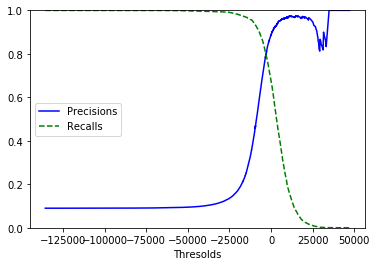

In [59]:
def plot_precision_recall_vs_thresold(precisions, recalls, thresolds):
    plt.plot(thresolds, precisions[:-1], 'b-', label="Precisions")
    plt.plot(thresolds, recalls[:-1], 'g--', label="Recalls")
    plt.xlabel("Thresolds")
    plt.legend(loc='center left')
    plt.ylim(0, 1)
plot_precision_recall_vs_thresold(precisions, recalls, thresolds)
plt.show()

In [0]:
# thresold for 90 % precision
thresold = thresolds[np.argmax(np.float32(precisions[:-1] >= 0.9))]

In [63]:
thresold

557.4528985270414

In [0]:
y_train_hat = decision_scores >= thresold

In [0]:
precision_val = precision_score(y_train_5, y_train_hat)

In [66]:
precision_val

0.9001919385796545

In [0]:
recall_val = recall_score(y_train_5, y_train_hat)

In [68]:
recall_val

0.6507433102081268

# Receiver Operating Characteristic (ROC) Curve TPR (Recall or Sensitivity) vs. FPR (1 - specificity)

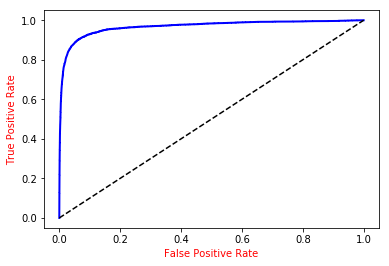

In [69]:
from sklearn.metrics import  roc_curve, roc_auc_score
fpr, tpr, thresolds = roc_curve(y_train_5, decision_scores)
def plot_tpr_vs_fpr(fpr, tpr, label=None):
    plt.plot(fpr, tpr, 'b-', linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', color='r')
    plt.ylabel('True Positive Rate', color='r')
plot_tpr_vs_fpr(fpr, tpr)
plt.show()

In [0]:
sgd_auc = roc_auc_score(y_train_5, decision_scores)

In [72]:
sgd_auc

0.9671194204567879

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rand_clf = RandomForestClassifier()

In [75]:
probas = cross_val_predict(rand_clf, X_train, y_train_5, cv=3, method='predict_proba')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [76]:
probas[:5]

array([[0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ]])

In [0]:
y_scores_rand = probas[:, 1]

In [82]:
y_scores_rand[:5]

array([0.9, 0. , 0. , 0.6, 0. ])

In [0]:
fpr_random, tpr_random, thresolds = roc_curve(y_train_5, y_scores_rand)

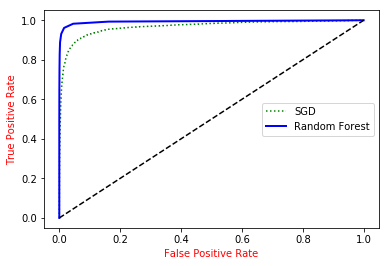

In [85]:
plt.plot(fpr, tpr, 'g:', label='SGD')
plot_tpr_vs_fpr(fpr_random, tpr_random, label='Random Forest')
plt.legend(loc='center right')
plt.show()

In [0]:
rand_auc = roc_auc_score(y_train_5, y_scores_rand)

In [87]:
rand_auc

0.9934235059812487